# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import covsirphy as cs
cs.__version__

'2.5.3'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [3]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

### The number of cases (JHU style)

In [4]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [5]:
print(data_loader.covid19dh_citation)

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Peru Data Repository (2020), https://github.com/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (2019), https://ec.europa.eu/
Geloky (2019), https://geloky

In [6]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
151184,2020-07-13,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
151185,2020-07-14,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
151186,2020-07-15,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
151187,2020-07-16,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
151188,2020-07-17,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04


In [7]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
151184,2020-07-13,Colombia,Vichada,1,0,0,1
151185,2020-07-14,Colombia,Vichada,1,0,0,1
151186,2020-07-15,Colombia,Vichada,1,0,0,1
151187,2020-07-16,Colombia,Vichada,1,0,0,1
151188,2020-07-17,Colombia,Vichada,1,0,0,1


In [8]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
180,2020-07-13,8046,1498,325,6223
181,2020-07-14,8189,1528,325,6336
182,2020-07-15,8354,1556,326,6472
183,2020-07-16,8640,1706,326,6608
184,2020-07-17,8933,1836,326,6771


In [9]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-07-13,20021229,9892754,849985,9278490,0.042454,0.463433,0.083920
2020-07-14,20387140,10071563,857253,9458324,0.042049,0.463936,0.083103
2020-07-15,20711386,10182833,864575,9663978,0.041744,0.466602,0.082117
2020-07-16,21086105,10355768,872100,9858237,0.041359,0.467523,0.081274
2020-07-17,21087746,10356748,872100,9858898,0.041356,0.467518,0.081269


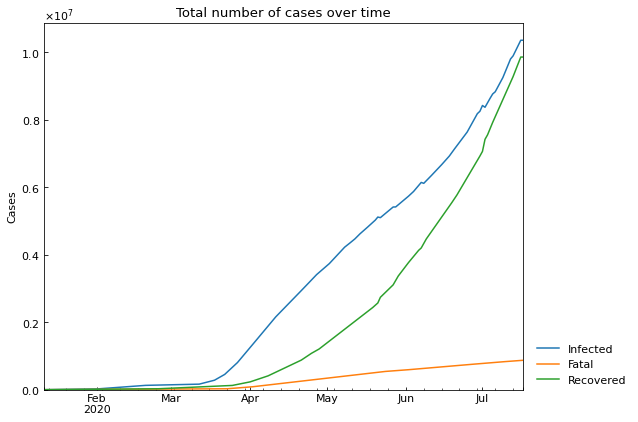

In [10]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [11]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
184,2020-07-13,22197,3114,983,18100
185,2020-07-14,22530,3271,983,18276
186,2020-07-15,22982,3460,984,18538
187,2020-07-16,23604,3811,984,18809
188,2020-07-17,24199,4124,984,19091


In [12]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [13]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
152,2020-07-12,21502,2517,982,18003
153,2020-07-13,21868,2783,982,18103
154,2020-07-14,22220,2956,982,18282
155,2020-07-15,22508,2979,984,18545
156,2020-07-16,22890,3091,985,18814


### Population in each country

In [14]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [15]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
151184,2020-07-13,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
151185,2020-07-14,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
151186,2020-07-15,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
151187,2020-07-16,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
151188,2020-07-17,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04


In [16]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Population
808,CZE,Czech Republic,Plzenský kraj,584672
809,COL,Colombia,Bolívar,2070110
810,RUS,Russia,Murmansk oblast,795409
811,RUS,Russia,Republic of Crimea,1913731
812,COL,Colombia,Vichada,107808


In [17]:
population_data.value("Japan", province=None)

126529100

In [18]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [19]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [20]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
151184,2020-07-13,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
151185,2020-07-14,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
151186,2020-07-15,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
151187,2020-07-16,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
151188,2020-07-17,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04


In [21]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
151184,2020-07-13,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
151185,2020-07-14,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
151186,2020-07-15,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
151187,2020-07-16,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
151188,2020-07-17,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04


In [22]:
# Subset for a country
oxcgrt_data.subset(country="Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
184,2020-07-13,2,0,1,0,0,0,0,3,2,2,1,27.78
185,2020-07-14,2,0,1,0,0,0,0,3,2,2,1,27.78
186,2020-07-15,2,0,1,0,0,0,0,3,2,2,1,27.78
187,2020-07-16,2,0,1,0,0,0,0,3,2,2,1,27.78
188,2020-07-17,2,0,1,0,0,0,0,3,2,2,1,27.78


In [23]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset(iso3="JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
184,2020-07-13,2,0,1,0,0,0,0,3,2,2,1,27.78
185,2020-07-14,2,0,1,0,0,0,0,3,2,2,1,27.78
186,2020-07-15,2,0,1,0,0,0,0,3,2,2,1,27.78
187,2020-07-16,2,0,1,0,0,0,0,3,2,2,1,27.78
188,2020-07-17,2,0,1,0,0,0,0,3,2,2,1,27.78


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [24]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

/mnt/c/Users/takay/Documents/github/covid19-sir/.venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


/mnt/c/Users/takay/Documents/github/covid19-sir/.venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


/mnt/c/Users/takay/Documents/github/covid19-sir/.venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


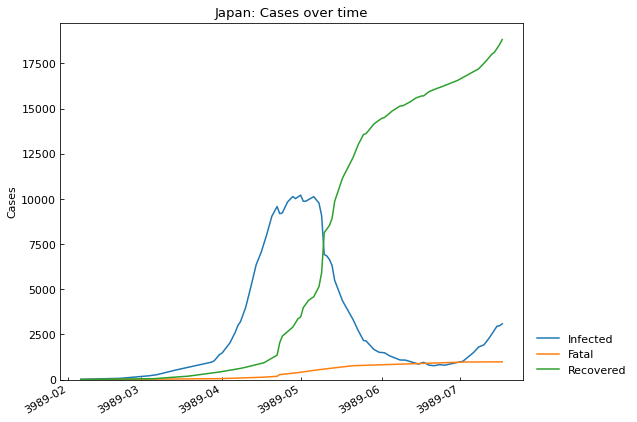

,Date,Confirmed,Infected,Fatal,Recovered
152,2020-07-12,21502,2517,982,18003
153,2020-07-13,21868,2783,982,18103
154,2020-07-14,22220,2956,982,18282
155,2020-07-15,22508,2979,984,18545
156,2020-07-16,22890,3091,985,18814


In [25]:
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

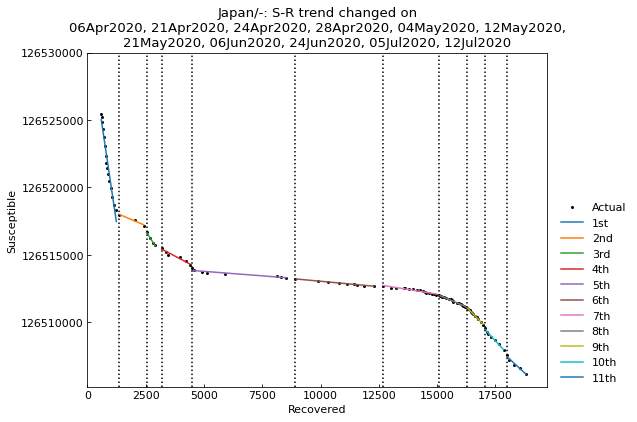

,Type,Start,End,Population
1st,Past,06Apr2020,20Apr2020,126529100
2nd,Past,21Apr2020,23Apr2020,126529100
3rd,Past,24Apr2020,27Apr2020,126529100
4th,Past,28Apr2020,03May2020,126529100
5th,Past,04May2020,11May2020,126529100
6th,Past,12May2020,20May2020,126529100
7th,Past,21May2020,05Jun2020,126529100
8th,Past,06Jun2020,23Jun2020,126529100
9th,Past,24Jun2020,04Jul2020,126529100
10th,Past,05Jul2020,11Jul2020,126529100


In [26]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [27]:
scenario.estimate(cs.SIRF)


<Main scenario: perform parameter estimation>

Running optimization with 8 CPUs...

	11th phase with SIR-F model finished 203 trials in 0 min 20 sec.

	2nd phase with SIR-F model finished 153 trials in 0 min 20 sec.

	1st phase with SIR-F model finished 267 trials in 0 min 35 sec.

	4th phase with SIR-F model finished 139 trials in 0 min 30 sec.

	3rd phase with SIR-F model finished 314 trials in 1 min 1 sec.

	5th phase with SIR-F model finished 298 trials in 0 min 51 sec.

	7th phase with SIR-F model finished 127 trials in 0 min 20 sec.

	6th phase with SIR-F model finished 241 trials in 0 min 40 sec.

	9th phase with SIR-F model finished 72 trials in 0 min 15 sec.

	10th phase with SIR-F model finished 77 trials in 0 min 15 sec.

	8th phase with SIR-F model finished 174 trials in 0 min 25 sec.

Completed optimization. Total: 2 min 58 sec

In [28]:
scenario.summary()

,Type,Start,End,Population,ODE,rho,sigma,theta,kappa,tau,Rt,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
1st,Past,06Apr2020,20Apr2020,126529100,SIR-F,0.010596,0.000781,0.002275,0.000097,160,12.04,0.002,1145,10,142,0.080925,267,0 min 35 sec
2nd,Past,21Apr2020,23Apr2020,126529100,SIR-F,0.004797,0.006371,0.094383,0.000479,160,0.63,0.094,232,23,17,0.042979,153,0 min 20 sec
3rd,Past,24Apr2020,27Apr2020,126529100,SIR-F,0.004017,0.001289,0.035908,0.000692,160,1.95,0.036,160,27,86,0.116288,314,1 min 1 sec
4th,Past,28Apr2020,03May2020,126529100,SIR-F,0.002858,0.002027,0.059281,0.000093,160,1.27,0.059,1199,38,54,0.030620,139,0 min 30 sec
5th,Past,04May2020,11May2020,126529100,SIR-F,0.001198,0.004883,0.306397,0.000005,160,0.17,0.306,24362,92,22,0.122151,298,0 min 51 sec
6th,Past,12May2020,20May2020,126529100,SIR-F,0.001389,0.009090,0.330559,0.000059,160,0.10,0.331,1879,79,12,0.047569,241,0 min 40 sec
7th,Past,21May2020,05Jun2020,126529100,SIR-F,0.003330,0.010542,0.117705,0.000525,160,0.27,0.118,211,33,10,0.093690,127,0 min 20 sec
8th,Past,06Jun2020,23Jun2020,126529100,SIR-F,0.006887,0.009382,0.038935,0.000079,160,0.70,0.039,1399,16,11,0.053439,174,0 min 25 sec
9th,Past,24Jun2020,04Jul2020,126529100,SIR-F,0.014396,0.008200,0.027397,0.001819,160,1.40,0.027,61,7,13,0.082094,72,0 min 15 sec
10th,Past,05Jul2020,11Jul2020,126529100,SIR-F,0.017380,0.008436,0.003232,0.000309,160,1.98,0.003,359,6,13,0.024104,77,0 min 15 sec


### Accuracy of estimation

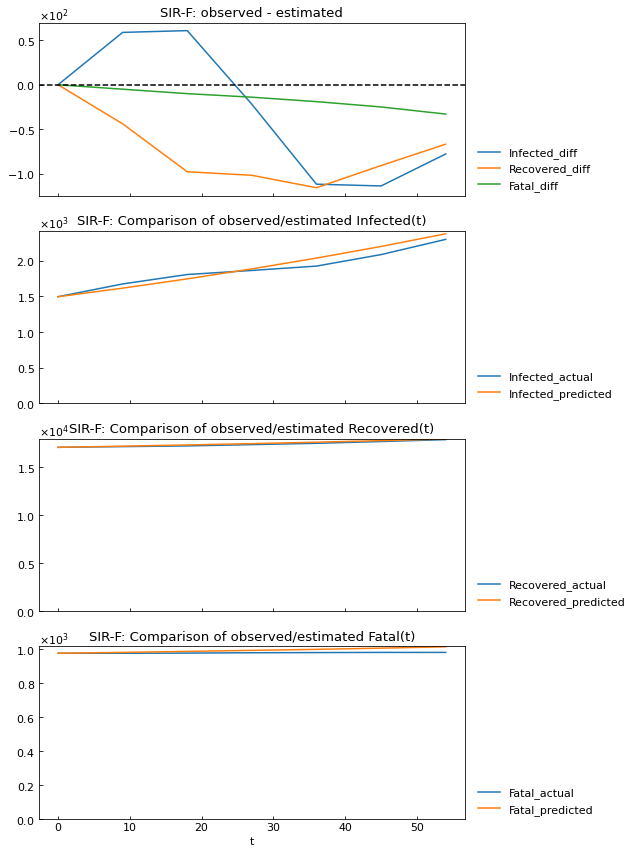

In [29]:
scenario.estimate_accuracy(phase="10th")

### Get parameter value

In [30]:
scenario.get("Rt", phase="4th")

1.27

### Show parameter history

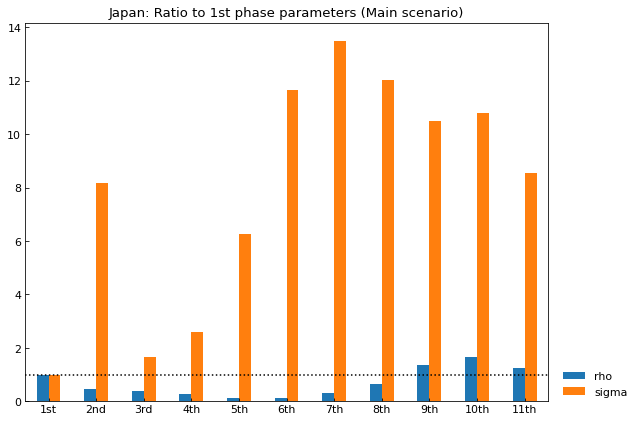

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,11th
rho,1.0,0.452722,0.379155,0.269704,0.113049,0.131120,0.314278,0.649983,1.358674,1.640281,1.242011
sigma,1.0,8.157641,1.651056,2.595225,6.252888,11.640471,13.499548,12.013930,10.499967,10.802021,8.559344


In [31]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

### Show the history of reproduction number

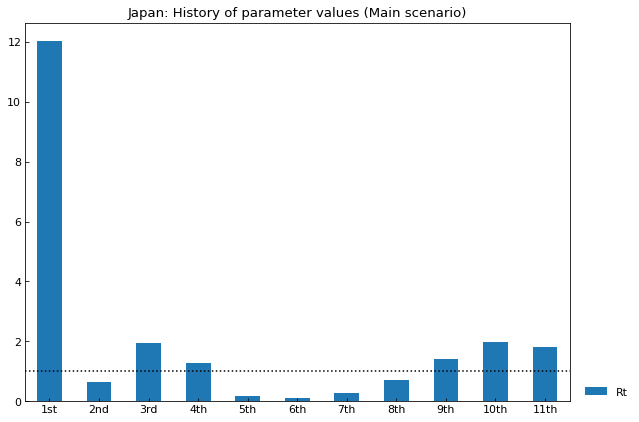

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,11th
Rt,12.04,0.63,1.95,1.27,0.17,0.1,0.27,0.7,1.4,1.98,1.82


In [32]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

### Simulate the number of cases

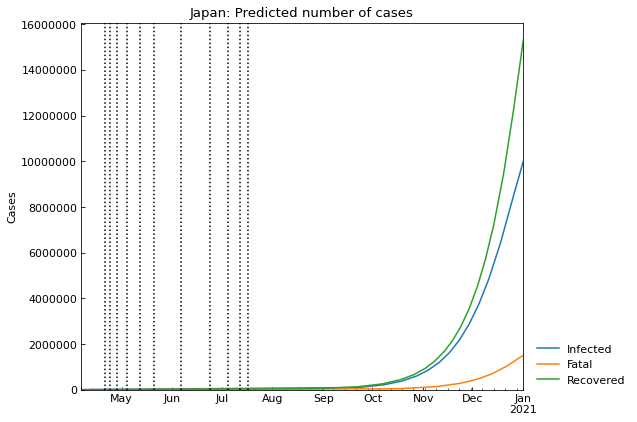

,Date,Fatal,Infected,Recovered,Susceptible
266,28Dec2020,1317667,9013170,13272136,102926125
267,29Dec2020,1369997,9288670,13822189,102048243
268,30Dec2020,1423729,9564678,14388876,101151816
269,31Dec2020,1478857,9840560,14972305,100237378
270,01Jan2021,1510027,9993577,15303007,99722490


In [33]:
scenario.clear(name="Main")
scenario.add_phase(name="Main", end_date="01Jan2021")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [34]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.006684230430123745

In [35]:
sigma_new = sigma_current * 2
sigma_new

0.01336846086024749

In [36]:
scenario.clear(name="Medicine")
scenario.add_phase(name="Medicine", days=30, sigma=sigma_current)
scenario.add_phase(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE       rho  \
Scenario Phase                                                              
Main     1st      Past  06Apr2020  20Apr2020   126529100  SIR-F  0.010596   
         2nd      Past  21Apr2020  23Apr2020   126529100  SIR-F  0.004797   
         3rd      Past  24Apr2020  27Apr2020   126529100  SIR-F  0.004017   
         4th      Past  28Apr2020  03May2020   126529100  SIR-F  0.002858   
         5th      Past  04May2020  11May2020   126529100  SIR-F  0.001198   
         6th      Past  12May2020  20May2020   126529100  SIR-F  0.001389   
         7th      Past  21May2020  05Jun2020   126529100  SIR-F  0.003330   
         8th      Past  06Jun2020  23Jun2020   126529100  SIR-F  0.006887   
         9th      Past  24Jun2020  04Jul2020   126529100  SIR-F  0.014396   
         10th     Past  05Jul2020  11Jul2020   126529100  SIR-F  0.017380   
         11th     Past  12Jul2020  16Jul2020   126529100  SIR-F  0.013160   
         12th   Future  17Jul2020  01Jan2021   126529100  SIR-F  0.013160   
Medicine 1st      Past  06Apr2020  20Apr2020   126529100  SIR-F  0.010596   
         2nd      Past  21Apr2020  23Apr2020   126529100  SIR-F  0.004797   
         3rd      Past  24Apr2020  27Apr2020   126529100  SIR-F  0.004017   
         4th      Past  28Apr2020  03May2020   126529100  SIR-F  0.002858   
         5th      Past  04May2020  11May2020   126529100  SIR-F  0.001198   
         6th      Past  12May2020  20May2020   126529100  SIR-F  0.001389   
         7th      Past  21May2020  05Jun2020   126529100  SIR-F  0.003330   
         8th      Past  06Jun2020  23Jun2020   126529100  SIR-F  0.006887   
         9th      Past  24Jun2020  04Jul2020   126529100  SIR-F  0.014396   
         10th     Past  05Jul2020  11Jul2020   126529100  SIR-F  0.017380   
         11th     Past  12Jul2020  16Jul2020   126529100  SIR-F  0.013160   
         12th   Future  17Jul2020  16Aug2020   126529100  SIR-F  0.013160   
         13th   Future  17Aug2020  01Jan2021   126529100  SIR-F  0.013160   

                   sigma     theta     kappa  tau     Rt  alpha1 [-]  \
Scenario Phase                                                         
Main     1st    0.000781  0.002275  0.000097  160  12.04       0.002   
         2nd    0.006371  0.094383  0.000479  160   0.63       0.094   
         3rd    0.001289  0.035908  0.000692  160   1.95       0.036   
         4th    0.002027  0.059281  0.000093  160   1.27       0.059   
         5th    0.004883  0.306397  0.000005  160   0.17       0.306   
         6th    0.009090  0.330559  0.000059  160   0.10       0.331   
         7th    0.010542  0.117705  0.000525  160   0.27       0.118   
         8th    0.009382  0.038935  0.000079  160   0.70       0.039   
         9th    0.008200  0.027397  0.001819  160   1.40       0.027   
         10th   0.008436  0.003232  0.000309  160   1.98       0.003   
         11th   0.006684  0.022570  0.000395  160   1.82       0.023   
         12th   0.006684  0.022570  0.000395  160   1.82       0.023   
Medicine 1st    0.000781  0.002275  0.000097  160  12.04       0.002   
         2nd    0.006371  0.094383  0.000479  160   0.63       0.094   
         3rd    0.001289  0.035908  0.000692  160   1.95       0.036   
         4th    0.002027  0.059281  0.000093  160   1.27       0.059   
         5th    0.004883  0.306397  0.000005  160   0.17       0.306   
         6th    0.009090  0.330559  0.000059  160   0.10       0.331   
         7th    0.010542  0.117705  0.000525  160   0.27       0.118   
         8th    0.009382  0.038935  0.000079  160   0.70       0.039   
         9th    0.008200  0.027397  0.001819  160   1.40       0.027   
         10th   0.008436  0.003232  0.000309  160   1.98       0.003   
         11th   0.006684  0.022570  0.000395  160   1.82       0.023   
         12th   0.006684  0.022570  0.000395  160   1.82       0.023   
         13th   0.013368  0.022570  0.000395  160   0.93       0.0

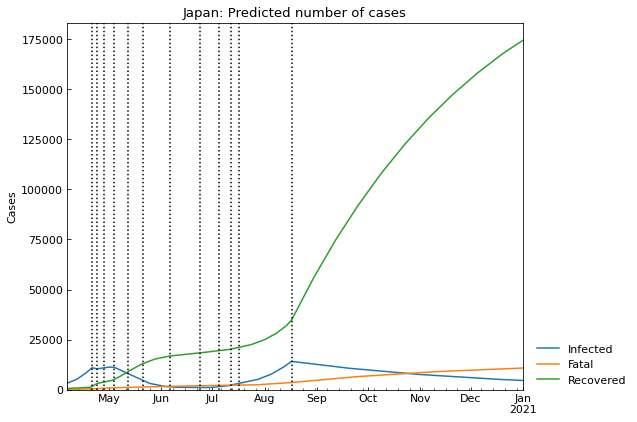

,Date,Fatal,Infected,Recovered,Susceptible
266,28Dec2020,10728,4736,172598,126341037
267,29Dec2020,10758,4697,173165,126340480
268,30Dec2020,10787,4658,173728,126339927
269,31Dec2020,10816,4620,174286,126339378
270,01Jan2021,10832,4599,174595,126339076


In [37]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [38]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 01Jan2021,Fatal on 01Jan2021
Main,9993577,01Jan2021,9993577,1510027
Medicine,14143,17Aug2020,4599,10832
